In [1]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
tf.__version__

'2.16.1'

In [4]:
devices = tf.config.list_physical_devices()
devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
# tf.config.experimental.set_memory_growth(devices[0], True)

# Introduction to Neural Networks Demo 

In [6]:
BASE_DIR = "./data"
MAX_N_IMAGES = 200

In [7]:
image_classes = os.listdir(BASE_DIR)

In [8]:
directories = [os.path.join(BASE_DIR, image_class) for image_class in image_classes]

In [9]:
all_images = []
all_classes = []

for image_class, directory in zip(image_classes, directories):
    image = os.listdir(directory)[:MAX_N_IMAGES]
    full_path = [os.path.join(directory, image_path) for image_path in image]
    all_images += [imread(img) for img in full_path]
    all_classes += [image_class] * MAX_N_IMAGES

In [10]:
all_images = np.array(all_images)
all_classes = np.array(all_classes)

Text(0.5, 1.0, 'A')

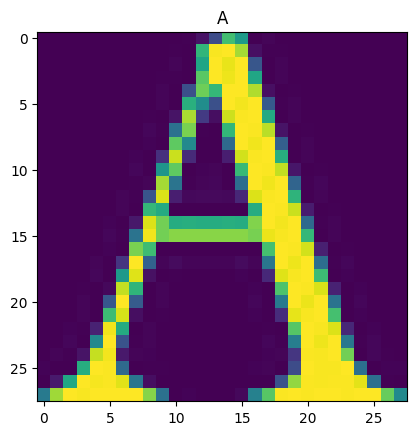

In [11]:
plt.imshow(all_images[42])
plt.title(all_classes[42])

In [12]:
all_images_scaled = all_images / 255.0

In [13]:
train_images, test_images, train_classes, test_classes = train_test_split(all_images_scaled, all_classes, test_size=500, stratify=all_classes)
train_images.shape, test_images.shape, train_classes.shape, test_classes.shape

((1500, 28, 28), (500, 28, 28), (1500,), (500,))

In [14]:
train_images_vectors = train_images.reshape(len(train_images), -1)
test_images_vectors = test_images.reshape(len(test_images), -1)

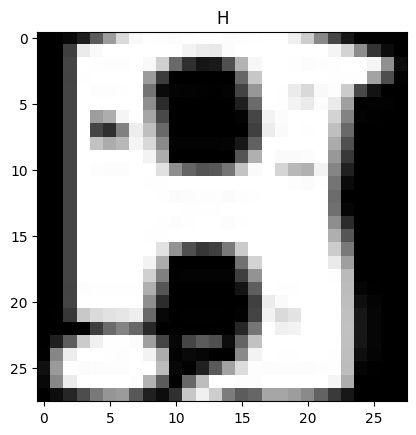

In [15]:
plt.imshow(train_images_vectors[18].reshape(28, 28), cmap="gray")
plt.title(train_classes[18])
plt.show()

In [16]:
neural_network = MLPClassifier(hidden_layer_sizes=(5, 5), verbose=True, max_iter=2000)
neural_network.fit(train_images_vectors, train_classes)

Iteration 1, loss = 2.30230367
Iteration 2, loss = 2.19696656
Iteration 3, loss = 2.13953547
Iteration 4, loss = 2.09242263
Iteration 5, loss = 2.05142033
Iteration 6, loss = 2.01558725
Iteration 7, loss = 1.98117827
Iteration 8, loss = 1.94990299
Iteration 9, loss = 1.92460659
Iteration 10, loss = 1.90182421
Iteration 11, loss = 1.87650797
Iteration 12, loss = 1.85502461
Iteration 13, loss = 1.83199879
Iteration 14, loss = 1.81031578
Iteration 15, loss = 1.78874063
Iteration 16, loss = 1.76699193
Iteration 17, loss = 1.74547471
Iteration 18, loss = 1.72461669
Iteration 19, loss = 1.70254195
Iteration 20, loss = 1.68131800
Iteration 21, loss = 1.66310284
Iteration 22, loss = 1.63935703
Iteration 23, loss = 1.61472551
Iteration 24, loss = 1.59939017
Iteration 25, loss = 1.57269938
Iteration 26, loss = 1.55007691
Iteration 27, loss = 1.52577230
Iteration 28, loss = 1.50427336
Iteration 29, loss = 1.48055299
Iteration 30, loss = 1.46155789
Iteration 31, loss = 1.43816265
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=2000, verbose=True)

In [17]:
neural_network.score(train_images_vectors, train_classes)

0.9693333333333334

In [18]:
neural_network.score(test_images_vectors, test_classes)

0.76

## TensorFlow

In [19]:
INPUT_DIMENSIONS = train_images_vectors.shape
NUM_CLASSES = len(image_classes)

INPUT_DIMENSIONS, NUM_CLASSES, train_images_vectors.shape[1]

((1500, 784), 10, 784)

In [20]:
train_classes = [ord(c) - ord("A") for c in train_classes]
test_classes = [ord(c) - ord("A") for c in test_classes]

In [32]:
tf.keras.backend.clear_session()

In [33]:
keras_nn = Sequential([
    Input(shape=(784,)),
    Dense(12, activation="relu", kernel_regularizer=L2(0.0001)),
    Dense(NUM_CLASSES, activation="softmax")
])

In [34]:
keras_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │           9,420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,550 (37.30 KB)

 Trainable params: 9,550 (37.30 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
keras_nn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
keras_nn.fit(
    train_images_vectors, 
    np.array(train_classes), 
    epochs=500, 
    validation_split=0.1, 
    callbacks=[
        EarlyStopping(monitor="val_accuracy", min_delta=0.001, patience=5)
    ]
)

Epoch 1/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1829 - loss: 2.2229 - val_accuracy: 0.3333 - val_loss: 1.8001
Epoch 2/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4899 - loss: 1.6465 - val_accuracy: 0.5933 - val_loss: 1.4588
Epoch 3/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6980 - loss: 1.2671 - val_accuracy: 0.7067 - val_loss: 1.2424
Epoch 4/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 1.0925 - val_accuracy: 0.7200 - val_loss: 1.0637
Epoch 5/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.8795 - val_accuracy: 0.7333 - val_loss: 0.9377
Epoch 6/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.7842 - val_accuracy: 0.8533 - val_loss: 0.6647
Epoch 7/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.5660 - val_accuracy: 0.8533 - val_loss: 0.6090
Epoch 8/500
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.5111 - val_accuracy: 0.8733 - v

In [37]:
keras_nn.evaluate(train_images_vectors, np.array(train_classes))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9453 - loss: 0.2416


[0.26733288168907166, 0.9426666498184204]